# DATASET AGUA POTABLE : [KAGGLE](https://www.kaggle.com/datasets/adityakadiwal/water-potability/data)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CARGA DEL DATASET

In [21]:
df = pd.read_csv('/content/water_potability.csv')
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# EDA - PREPARACION DE LOS DATOS

In [22]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [23]:
X = df.iloc[:,0:9].values
y = df.iloc[:,9].values
print(X)
print(y)

[[           nan 2.04890455e+02 2.07913190e+04 ... 1.03797831e+01
  8.69909705e+01 2.96313538e+00]
 [3.71608008e+00 1.29422921e+02 1.86300579e+04 ... 1.51800131e+01
  5.63290763e+01 4.50065627e+00]
 [8.09912419e+00 2.24236259e+02 1.99095417e+04 ... 1.68686369e+01
  6.64200925e+01 3.05593375e+00]
 ...
 [9.41951032e+00 1.75762646e+02 3.31555782e+04 ... 1.10390697e+01
  6.98454003e+01 3.29887550e+00]
 [5.12676292e+00 2.30603758e+02 1.19838694e+04 ... 1.11689462e+01
  7.74882131e+01 4.70865847e+00]
 [7.87467136e+00 1.95102299e+02 1.74041771e+04 ... 1.61403676e+01
  7.86984463e+01 2.30914906e+00]]
[0 0 0 ... 1 1 1]


In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(X[:,0:9])
X[:,0:9] = imputer.transform(X[:,0:9])
X

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
X_train

array([[-1.06553244e+00,  9.84537823e-01,  1.52038128e+00, ...,
         1.95307979e-01, -1.24406641e+00, -1.49773516e+00],
       [-6.04313345e-16,  4.36911633e-01, -9.51574693e-01, ...,
        -1.18854871e+00, -1.33770861e+00, -7.71400235e-01],
       [-6.04313345e-16,  1.14037393e+00, -1.17598897e+00, ...,
         1.22561748e+00, -1.50428834e+00, -5.85420497e-01],
       ...,
       [-2.94468081e-01, -1.37725627e-01, -7.79927065e-01, ...,
         3.48680803e-01, -6.25585662e-01, -1.75585109e-01],
       [ 4.04916868e-01,  1.12339321e+00,  1.89228254e-01, ...,
         1.26205271e+00, -3.42648576e-01,  1.37604146e+00],
       [-6.04313345e-16, -1.07844741e+00, -9.20569590e-01, ...,
         2.79267418e-01,  5.82132720e-01,  2.23983551e-01]])

# ENTRENAMIENTO DE RED NEURONAL CON PYTORCH

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

## CREAMOS MODELO

In [41]:
class RedNeuronalInicial(nn.Module):
  def __init__(self):
    super(RedNeuronal,self).__init__()
    self.entrada = nn.Linear(9,500)
    self.oculta1 = nn.Linear(500,500)
    self.oculta2 = nn.Linear(500,500)
    self.salida = nn.Linear(500,1)
    self.dropout = nn.Dropout(0.4)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.relu(self.entrada(x))
    x = self.dropout(x)
    x = self.relu(self.oculta1(x))
    x = self.dropout(x)
    x = self.relu(self.oculta2(x))
    x = self.dropout(x)
    x = self.sigmoid(self.salida(x))
    return x

In [43]:
class RedNeuronal(nn.Module):
    def __init__(self):
        super(RedNeuronal, self).__init__()
        self.entrada = nn.Linear(9, 256)  # Capa de entrada (9 características)
        self.oculta1 = nn.Linear(256, 128)  # Primera capa oculta
        self.oculta2 = nn.Linear(128, 64)  # Segunda capa oculta
        self.salida = nn.Linear(64, 1)  # Capa de salida
        self.dropout = nn.Dropout(0.3)  # Dropout con probabilidad de 0.5
        self.relu = nn.ReLU()  # Función de activación ReLU
        self.sigmoid = nn.Sigmoid()  # Activación de salida Sigmoid para clasificación binaria

    def forward(self, x):
        x = self.relu(self.entrada(x))
        x = self.relu(self.oculta1(x))
        x = self.dropout(x)  # Aplicar dropout
        x = self.relu(self.oculta2(x))
        x = self.sigmoid(self.salida(x))  # Activación sigmoid para salida
        return x

In [44]:
modelo = RedNeuronal()

## CREAMOS FUNCION DE PERDIDA Y OPTIMIZADOR

In [49]:
criterion = nn.BCELoss()
optimizer = optim.RMSprop(modelo.parameters(),lr=0.001,weight_decay=0.01)

## ENTRENAMOS NUESTRO MODELO

## CONVERTIR X Y Y EN TENSORES

In [50]:
X_train_tensor = torch.tensor(X_train,dtype=torch.float32)
y_train_tensor = torch.tensor(y_train,dtype=torch.float32)

### CREAMOS LOGICA DE ENTRENAMIENTO

In [51]:
import matplotlib.pyplot as plt
# Entrenamiento del modelo
epochs = 10
batch_size = 50
# Listas para almacenar el loss y accuracy
losses = []
accuracies = []

for epoch in range(epochs):
    modelo.train()
    running_loss = 0.0
    correct = 0

    for i in range(0, len(X_train_tensor), batch_size):
        # Obtener el batch
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size].unsqueeze(1)

        # Hacer una predicción
        outputs = modelo(X_batch)

        # Calcular la pérdida
        loss = criterion(outputs, y_batch)
        running_loss += loss.item()

        # Limpiar los gradientes
        optimizer.zero_grad()

        # Retropropagación
        loss.backward()

        # Actualizar los pesos
        optimizer.step()

    # Calcular la pérdida media y la precisión
    epoch_loss = running_loss / (len(X_train_tensor) / batch_size)
    losses.append(epoch_loss)

    # Evaluar el modelo en el conjunto de entrenamiento
    modelo.eval()
    with torch.no_grad():
        outputs = modelo(X_train_tensor)
        predicted = (outputs > 0.5).float()
        correct += (predicted.eq(y_train_tensor.unsqueeze(1))).sum().item()

    accuracy = correct / len(y_train_tensor)
    accuracies.append(accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

Epoch [1/10], Loss: 0.5947, Accuracy: 70.80%
Epoch [2/10], Loss: 0.5935, Accuracy: 70.69%
Epoch [3/10], Loss: 0.5938, Accuracy: 70.61%
Epoch [4/10], Loss: 0.5943, Accuracy: 70.27%
Epoch [5/10], Loss: 0.5924, Accuracy: 70.53%
Epoch [6/10], Loss: 0.5952, Accuracy: 70.73%
Epoch [7/10], Loss: 0.5908, Accuracy: 70.65%
Epoch [8/10], Loss: 0.5936, Accuracy: 70.27%
Epoch [9/10], Loss: 0.5972, Accuracy: 70.15%
Epoch [10/10], Loss: 0.5957, Accuracy: 70.38%


### GRAFICAMOS LOSS Y ACCURACY

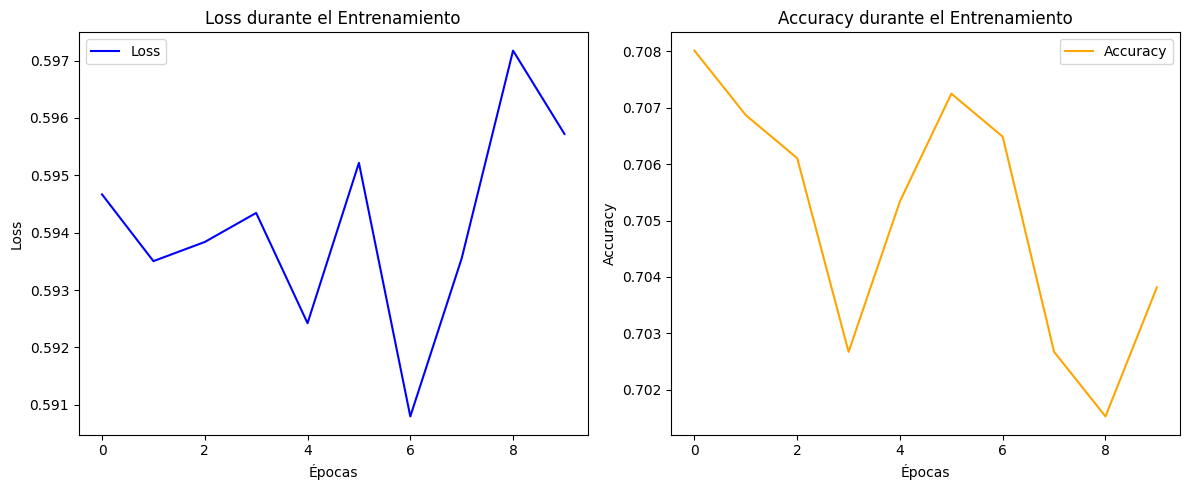

In [52]:
# Graficar loss y accuracy
plt.figure(figsize=(12, 5))

# Gráfica de Loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss', color='blue')
plt.title('Loss durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Gráfica de Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='orange')
plt.title('Accuracy durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### EVALUAMOS EL MODELO

In [53]:
#CAMBIAR MODELO A MODO EVALUACIÓN
modelo.eval()
with torch.no_grad():
  X_test_tensor = torch.tensor(X_test,dtype=torch.float32)
  y_test_tensor = torch.tensor(y_test,dtype=torch.float32).unsqueeze(1)

  #predicciones
  test_outputs = modelo(X_test_tensor)

  precited_test = (test_outputs > 0.5).float()

  #calculamos accuracy
  correct_test = (precited_test.eq(y_test_tensor)).sum().item()
  accuracy_test = correct_test / len(y_test_tensor)

print(f'El score de prueba es {accuracy_test * 100:.2f}%')

El score de prueba es 67.68%


### MATRIZ DE CONFUSIÓN

Test Accuracy: 67.68%


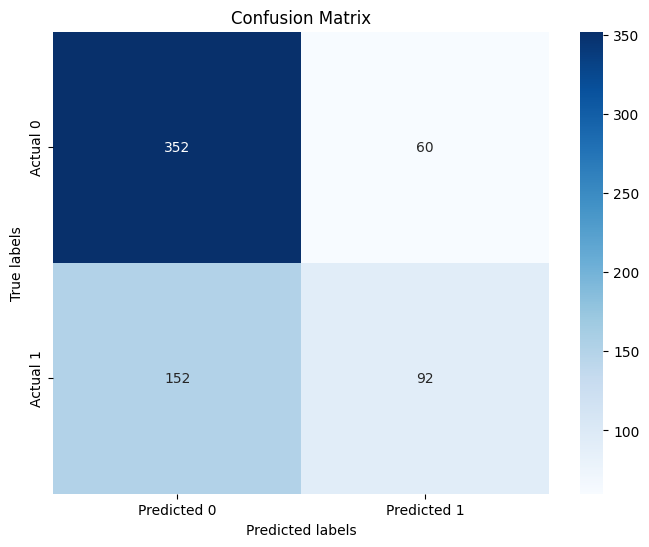

In [55]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Evaluación del modelo en el conjunto de prueba
modelo.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    test_outputs = modelo(X_test_tensor)
    predicted_test = (test_outputs > 0.5).float()
    correct_test = (predicted_test.eq(y_test_tensor)).sum().item()
    accuracy_test = correct_test / len(y_test_tensor)

print(f"Test Accuracy: {accuracy_test * 100:.2f}%")

# Crear la matriz de confusión
y_test_labels = y_test_tensor.numpy()  # Convertir a numpy para sklearn
predicted_labels = predicted_test.numpy()  # Convertir a numpy para sklearn

cm = confusion_matrix(y_test_labels, predicted_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=['Predicted 0', 'Predicted 1'],
             yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()